In [1]:
from datamodules.ucg2cg import UCG2CGDataModule
from datamodules.ucg2cg import UCG2CGDataset
from modules.diffusion_model import LitUCG2CGNoiseNet

In [4]:
# datamodule = UCG2CGDataModule(
#         cg_files       = ["sample-data/cg/pfpatch_000000000138.npz", "sample-data/cg/pfpatch_000000000214.npz", "sample-data/cg/pfpatch_000000000272.npz"],
#         ucg_files      = ["sample-data/ucg/pfpatch_000000000138_ucg.npz", "sample-data/ucg/pfpatch_000000000214_ucg.npz", "sample-data/ucg/pfpatch_000000000272_ucg.npz"],
#         ucg_index_file = "sample-data/cg/all_indices_per_cluster.npz",
#         batch_size     = 3,
#         num_workers    = 1,
#         train_size     = 0.5,
#     )

In [5]:
# datamodule.setup()
# loader = datamodule.val_dataloader()
# batch = next(iter(loader))
# ucg_pos = batch['ucg_pos']
# cg_pos = batch["cg_pos"]

In [2]:
ckpt_path = 'lightning_logs/version_8/checkpoints/epoch=1800-step=585325.ckpt'
# ckpt_path = "lit_logs/dimers-C/version_0/checkpoints/epoch=16-step=100.ckpt"
noise_net = LitUCG2CGNoiseNet.load_from_checkpoint(ckpt_path, ucg_index_file="sample-data/cg/all_indices_per_cluster.npz")



In [6]:
# import torch

# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# noise_net = noise_net.to(device)
# ucg_pos = ucg_pos.to(device)

# pred_cg_pos = noise_net.generate(ucg_pos, num_steps=10)

In [7]:
# import numpy as np
# import torch
# from utils.datautils import DataUtils
# from utils.viz import plot_rmsds

# def generate_rmsd_plot(num_steps):
    # Collect RMSDs
    all_rmsds = []

    datamodule.setup()
    val_loader = datamodule.val_dataloader()

    noise_net.eval()
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

    for batch in val_loader:
        ucg_pos = batch["ucg_pos"].to(device)  # shape: (B, N, 3)
        cg_pos = batch["cg_disp"].numpy()    # shape: (B, N, 3)

        with torch.no_grad():
            pred_cg_pos = noise_net.generate(ucg_pos, num_steps)
            
        pred_cg_pos = pred_cg_pos[:,-1,:,:]
        pred_cg_pos = pred_cg_pos.cpu().numpy()

        batch_rmsds = DataUtils.rmsd(pred_cg_pos, cg_pos)  # shape: (B,)
        all_rmsds.extend(batch_rmsds.tolist())

    all_rmsds = np.array(all_rmsds)

    # Plotting
    plot_rmsds(all_rmsds, title="Validation RMSD Distribution", filename="val_rmsd.png")

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv("/Users/jonathan/Downloads/version_8_train.csv")
# plt.plot(df['Step'], df['Value'])
# df = pd.read_csv("/Users/jonathan/Downloads/version_8_valid.csv")
# plt.plot(df["Step"], df["Value"])
# plt.xlabel("Step")
# plt.ylabel("MSE Loss")
# plt.title("Training and Validation Loss")
# plt.grid(True)
# plt.savefig("loss_plot.png", dpi=300)  # Saves a high-quality image
# plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# def smooth(values, window=100):
#     return values.rolling(window, min_periods=1, center=True).mean()

# # Load data
# train_df = pd.read_csv("/Users/jonathan/Downloads/version_8_train.csv")
# valid_df = pd.read_csv("/Users/jonathan/Downloads/version_8_valid.csv")

# # Smooth the values
# # train_smoothed = smooth(train_df['Value'], window=300)
# # valid_smoothed = smooth(valid_df['Value'], window=300)

# # Plot
# plt.figure(figsize=(10, 6))
# plt.plot(train_df['Step'], train_df["Value"], label='Training Loss', color='lightskyblue')
# plt.plot(valid_df['Step'], valid_df["Value"], label='Validation Loss', color='pink')

# # Labels and grid
# plt.xlabel("Step")
# plt.ylabel("MSE Loss")
# plt.title("Training and Validation Loss")
# plt.legend(fontsize=12)
# plt.grid(True)

# # Optional: Zoom in to highlight 0.22 region
# plt.ylim(0.20, 0.26)

# # Save and show
# plt.savefig("loss_plot_smooth.png", dpi=600, bbox_inches='tight')
# plt.show()


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_diffusion_samples(samples, titles=None):
    """
    Visualize 3 CG protein samples at different diffusion timesteps.

    Args:
        samples (list of np.ndarray): List of 3 arrays of shape (N, 3)
        titles (list of str): Optional titles for each subplot
    """
    assert len(samples) == 3, "Expected 3 samples"
    fig = plt.figure(figsize=(15, 5))
    
    for i, coords in enumerate(samples):
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')
        ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='b', s=40)
        ax.set_title(titles[i] if titles else f"Timestep {i * 250}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_box_aspect([1,1,1])  # Equal aspect ratio

    plt.tight_layout()
    # plt.savefig("reverse_diffusion_timestep_sample.png", dpi=600, bbox_inches='tight')
    plt.show()

In [33]:
# datamodule = UCG2CGDataModule(
#         cg_files       = ["sample-data/cg/pfpatch_000000000138.npz", "sample-data/cg/pfpatch_000000000214.npz", "sample-data/cg/pfpatch_000000000272.npz"],
#         ucg_files      = ["sample-data/ucg/pfpatch_000000000138_ucg.npz", "sample-data/ucg/pfpatch_000000000214_ucg.npz", "sample-data/ucg/pfpatch_000000000272_ucg.npz"],
#         ucg_index_file = "sample-data/cg/all_indices_per_cluster.npz",
#         batch_size     = 3,
#         num_workers    = 1,
#         train_size     = 0.5,
#     )

datamodule = UCG2CGDataModule(
        cg_files       = ["/Users/jonathan/Documents/LLNLMLBackmapping/sample-data/cg/pfpatch_000005132579.npz"],
        ucg_files      = ["/Users/jonathan/Documents/LLNLMLBackmapping/sample-data/ucg/pfpatch_000005132579_ucg.npz"],
        ucg_index_file = "sample-data/cg/all_indices_per_cluster.npz",
        batch_size     = 1,
        num_workers    = 1,
        # train_size     = 0.5,
    )

In [23]:
# from torch.utils.data import DataLoader
# import numpy as np

# # Data setup
# data = np.load("sample-data/ucg/pfpatch_000000000138_ucg.npz", allow_pickle=True)
# ucg_pos_traj = data['positions_ucg']
# val_loader = DataLoader(ucg_pos_traj, batch_size=3)

In [34]:
from tqdm import tqdm

datamodule.setup()
val_loader = datamodule.val_dataloader()
batch = next(iter(val_loader))

noise_net.eval()
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

pred_cg_disp = []
# ucg_pos = []
# for batch in tqdm(val_loader):
ucg_pos = batch['ucg_pos'].to(device)  # shape: (B, N, 3) 
print(ucg_pos.shape)
# ucg_pos.append(batch.to(device))
noise_net = noise_net.to(device)
# cg_disp = batch["cg_disp"].numpy()    # shape: (B, N, 3)

with torch.no_grad():
    pred_cg_disp.append(noise_net.generate(ucg_pos, 500))
    
# pred_cg_disp = pred_cg_disp[:,-1,:,:]


ValueError: With n_samples=1, test_size=None and train_size=0.99, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [25]:
noise_net.scatter_idx.shape

torch.Size([751])

In [26]:
# ucg_pos = torch.cat(ucg_pos)
ucg_pos.shape

torch.Size([3, 40, 3])

In [27]:
pred_cg_disp = torch.cat(pred_cg_disp)
pred_cg_disp.shape

torch.Size([3, 501, 751, 3])

In [28]:
B, T, N, D = pred_cg_disp.shape
scatter_idx = noise_net.scatter_idx.to(ucg_pos.device).contiguous()
scatter_idx = scatter_idx.unsqueeze(0).expand(B, -1).contiguous()
ucg_scattered = torch.gather(ucg_pos, dim=1, index=scatter_idx.unsqueeze(-1).expand(-1, -1, 3).contiguous())
ucg_scattered = ucg_scattered.unsqueeze(1).expand(-1, T, -1, -1)
pred_cg_pos = ucg_scattered + pred_cg_disp

In [29]:
pred_cg_pos.shape

torch.Size([3, 501, 751, 3])

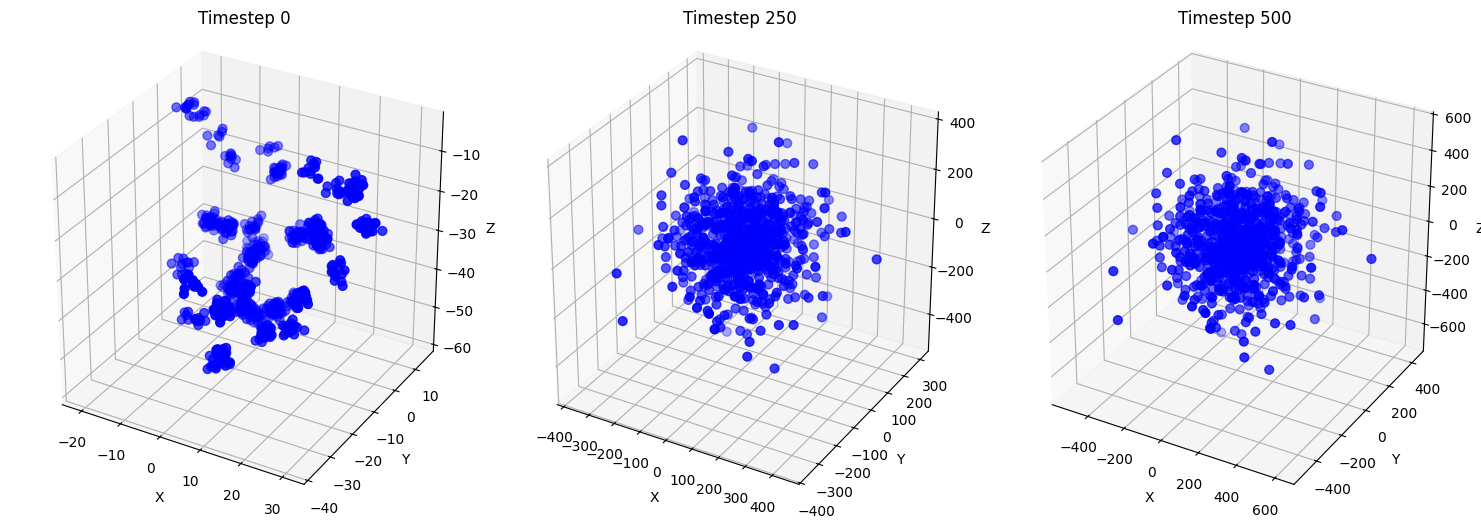

In [30]:
# data = np.load("pred-cg-500.npy")
# print(data.shape)
samples = [pred_cg_pos[1, 0, :,:].cpu(), pred_cg_pos[1, 250, :,:].cpu(), pred_cg_pos[1, 500,:,:].cpu()]
plot_diffusion_samples(samples)

In [17]:
from utils.datautils import DataUtils
cg_pos = batch['cg_pos'][0].to(device)

rmsds = [DataUtils.rmsd_torch(pred_cg_pos[0,0,:,:].unsqueeze(dim=0), cg_pos.unsqueeze(dim=0)), DataUtils.rmsd_torch(pred_cg_pos[0,250,:,:].unsqueeze(dim=0), cg_pos.unsqueeze(dim=0)), DataUtils.rmsd_torch(pred_cg_pos[0,500,:,:].unsqueeze(dim=0), cg_pos.unsqueeze(dim=0))]
rmsds

[tensor([7.0984], device='mps:0'),
 tensor([2.8949], device='mps:0'),
 tensor([2.0739], device='mps:0')]

In [ ]:
data = np.load("pred-cg-500.npy")
print(data.shape)
samples = [data[0][0], data[77][0], data[95][0]]
plot_diffusion_samples(samples)

In [ ]:
data = np.load("pred-cg-500.npy")
print(data.shape)